In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../data/video_games_sales.csv')

In [3]:
data_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
Name           16598 non-null object
Platform       16598 non-null object
Year           16327 non-null float64
Genre          16598 non-null object
Publisher      16540 non-null object
NA_Sales       16598 non-null float64
EU_Sales       16598 non-null float64
JP_Sales       16598 non-null float64
Other_Sales    16598 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


**note1**

```data_df.isnull().sum(axis=0)```

In [5]:
data_df.isnull().sum(axis=0)

Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

**note2**

```data_df['Year'].values.astype('str')```, switch float to str

In [9]:
data_df.dropna()
data_df['global_sales'] = data_df['NA_Sales']+data_df['EU_Sales']+data_df['JP_Sales']+data_df['Other_Sales']
data_df['year_str'] = [i.split('.')[0] for i in data_df['Year'].values.astype('str')]
filiter_year_df = data_df[(data_df['year_str']>='2005')&(data_df['year_str']<='2017')]

In [10]:
filiter_year_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,year_str
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2008
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2006
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2006


In [11]:
filiter_year_df.year_str.value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2012     657
2015     614
2014     582
2013     546
2016     344
2017       3
Name: year_str, dtype: int64

**note3**

```filiter_year_df.sort_values(by='global_sales', ascending=False)```

In [13]:
top20_games = filiter_year_df.sort_values(by='global_sales', ascending=False).head(20)
top20_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,year_str
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2008
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2006
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2006
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2009
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75,2005
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43,2005
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,2007
14,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,2009


**note4**

```DataFrame.plot(kind='bar', x='', y='')```

Text(0.5,1,'Top 20 Game Sales (2005 - 2017)')

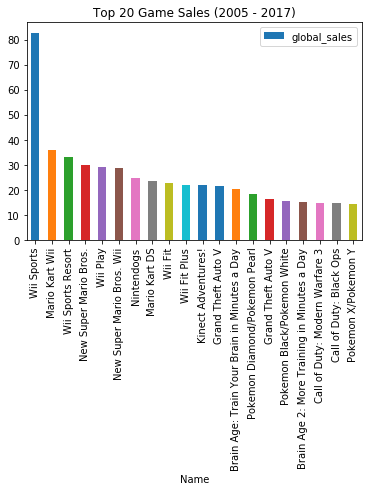

In [15]:
top20_games.plot(kind='bar', x='Name', y='global_sales')
plt.title('Top 20 Game Sales (2005 - 2017)')

**note5**

```DataFrame.groupby('')[ ['a','b','c','d'] ].sum()```, sum up each column in a b c d

In [18]:
publisher_sales = filiter_year_df[filiter_year_df['global_sales']>5].groupby('Publisher')[ ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] ].sum()
publisher_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
505 Games,6.63,4.58,0.07,1.25
Activision,105.52,67.51,3.89,24.44
Bethesda Softworks,10.05,8.72,0.59,3.00
Capcom,2.43,2.00,5.21,0.99
Electronic Arts,17.48,45.58,1.14,13.33
Konami Digital Entertainment,2.63,1.74,0.83,0.83
LucasArts,3.66,1.63,0.00,0.53
Microsoft Game Studios,68.76,26.54,0.95,8.90
Nintendo,258.96,201.40,120.60,53.11


**note6**

```df = DataFrame.groupby('')[ ['a','b','c','d'] ].sum()```

```df.plot(kind='bar', stacked=True)```

Text(0.5,1,'Game Sales Comparison (2005 - 2017)')

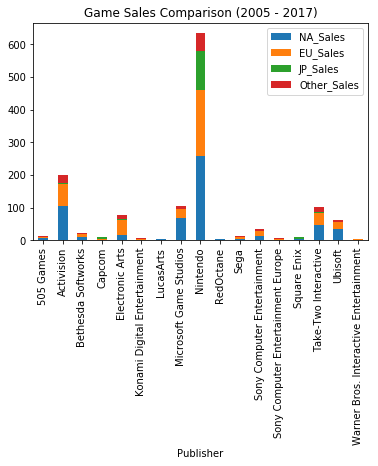

In [19]:
publisher_sales.plot(kind='bar', stacked=True)
plt.title('Game Sales Comparison (2005 - 2017)')

```python
"""
    明确任务：
        1. 2005-2017年全球销量的top20的游戏
        2. 2005-2017年各游戏生产商的销量对比，并使用堆叠柱状图进行可视化
"""
import os
import pandas as pd
import matplotlib.pyplot as plt

datafile_path = './data_pd/video_games_sales.csv'

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    data_df = pd.read_csv(datafile_path)
    return data_df


def inspect_data(data_df):
    """
        查看数据
    """
    print('数据一共有{}行，{}列'.format(data_df.shape[0], data_df.shape[1]))

    print('数据预览：')
    print(data_df.head())

    print('数据基本信息：')
    print(data_df.info())

    print('数据统计信息：')
    print(data_df.describe())


def process_data(data_df):
    """
        数据处理
    """
    # 处理空值
    cln_data_df = data_df.dropna()

    # 按年份过滤
    cond = (cln_data_df['Year'] >= 2005) & (cln_data_df['Year'] <= 2017)
    cln_data_df1 = cln_data_df[cond]
    filtered_data_df = cln_data_df1.copy()

    # 全球销量计算
    filtered_data_df['Global_Sales'] = filtered_data_df['NA_Sales'] + filtered_data_df['EU_Sales'] \
                                       + filtered_data_df['JP_Sales'] + filtered_data_df['Other_Sales']

    print('原始数据有{}行记录，处理后的数据有{}行记录'.format(data_df.shape[0], filtered_data_df.shape[0]))
    return filtered_data_df


def analyze_data(data_df):
    """
        数据分析
    """
    top20_games = data_df.sort_values(by='Global_Sales', ascending=False).head(20)

    filtered_data_df = data_df[data_df['Global_Sales'] > 5]
    grouped_df = filtered_data_df.groupby('Publisher')
    sales_comp_results = grouped_df[ ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] ].sum()

    return top20_games, sales_comp_results


def save_and_show_results(top20_games, sales_comp_results):
    """
        结果展示
    """
    top20_games.to_csv(os.path.join(output_path, 'top20_games.csv'), index=False)
    sales_comp_results.to_csv(os.path.join(output_path, 'sales_comp_results.csv'))

    top20_games.plot(kind='bar', x='Name', y='Global_Sales')
    plt.title('Top 20 Game Sales (2005 - 2017)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'top20_games.png'))
    plt.show()

    sales_comp_results.plot.bar(stacked=True)
    plt.title('Game Sales Comparison (2005 - 2017)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'sales_comp_results.png'))
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取
    data_df = collect_data()

    # 查看数据信息
    inspect_data(data_df)

    # 数据处理
    proc_data_df = process_data(data_df)

    # 数据分析
    top20_games, sales_comp_results = analyze_data(proc_data_df)

    save_and_show_results(top20_games, sales_comp_results)


if __name__ == '__main__':
    main()
```